# Question:

Given the `head` of a singly linked list and two integers `left` and `right` where `left <= right`, reverse the nodes of the list from position `left` to position `right`, and return the reversed list.

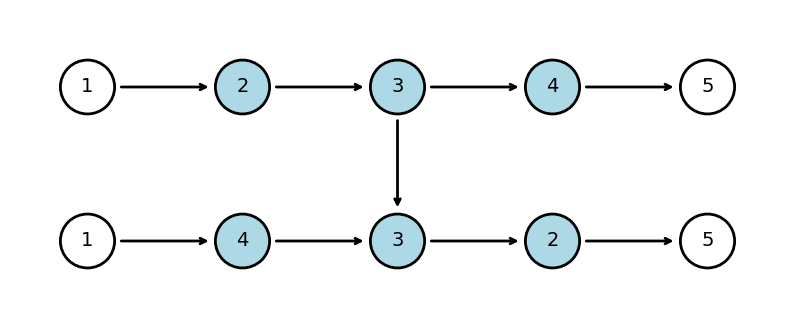

In [6]:
import matplotlib.pyplot as plt

def draw_node(x, y, label, filled=False):
    circle = plt.Circle((x, y), 0.35,
                        edgecolor='black',
                        facecolor='lightblue' if filled else 'white',
                        linewidth=2)
    plt.gca().add_patch(circle)
    plt.text(x, y, label, ha='center', va='center', fontsize=14)

def draw_arrow(x1, y1, x2, y2):
    plt.annotate("",
                 xy=(x2, y2), xytext=(x1, y1),
                 arrowprops=dict(arrowstyle="->", linewidth=2))

plt.figure(figsize=(10,4))

# Top row
draw_node(0, 1, "1")
draw_node(2, 1, "2", True)
draw_node(4, 1, "3", True)
draw_node(6, 1, "4", True)
draw_node(8, 1, "5")

draw_arrow(0.4,1,1.6,1)
draw_arrow(2.4,1,3.6,1)
draw_arrow(4.4,1,5.6,1)
draw_arrow(6.4,1,7.6,1)

# Down arrow
draw_arrow(4,0.6,4,-0.6)

# Bottom row
draw_node(0,-1, "1")
draw_node(2,-1, "4", True)
draw_node(4,-1, "3", True)
draw_node(6,-1, "2", True)
draw_node(8,-1, "5")

draw_arrow(0.4,-1,1.6,-1)
draw_arrow(2.4,-1,3.6,-1)
draw_arrow(4.4,-1,5.6,-1)
draw_arrow(6.4,-1,7.6,-1)

plt.axis('off')
plt.xlim(-1,9)
plt.ylim(-2,2)
plt.show()

Above example: 


Input: head = [1,2,3,4,5], 

left = 2, right = 4

Output: [1,4,3,2,5]

--------

ListNode class:

In [22]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

------

To create nodeList from an array:

In [26]:
def nodeList(arr): 
    arr = arr[::-1]
    start = ListNode(arr.pop())
    head = start

    while arr:
        start.next = ListNode(arr.pop())
        start = start.next
    
    return head

---------

Printing whole listNode in order:

In [24]:
def printNodes(head):
    while head is not None:
        print(head.val, end = ' ')
        head = head.next
    
    print()

------

The algorithm we'll mention !!

In [25]:
def reverseBetween(head, left, right):
    dummy = ListNode(0, head)
    leftParent = dummy

    for i in range(left-1):
        leftParent = leftParent.next
    
    leftNode = leftParent.next
    
    for _ in range(right - left):
        leftNext = leftNode.next
        leftParent.next, leftNext.next, leftNode.next = leftNode.next, leftParent.next, leftNext.next

    return dummy.next

----------

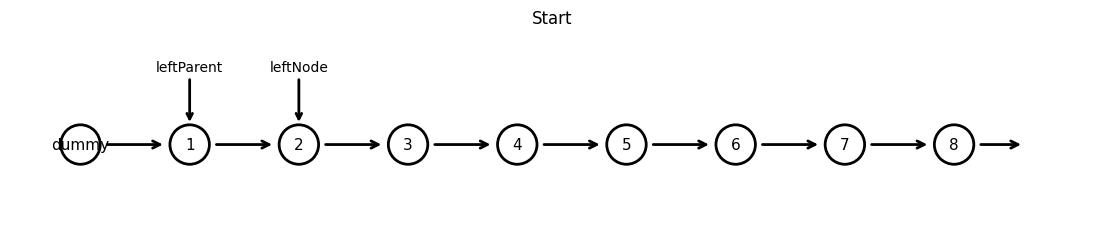

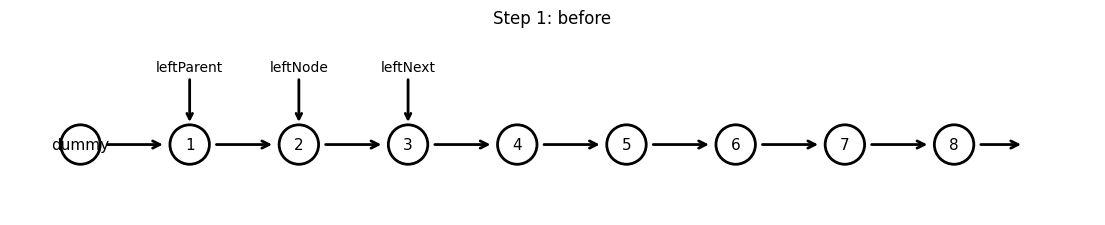

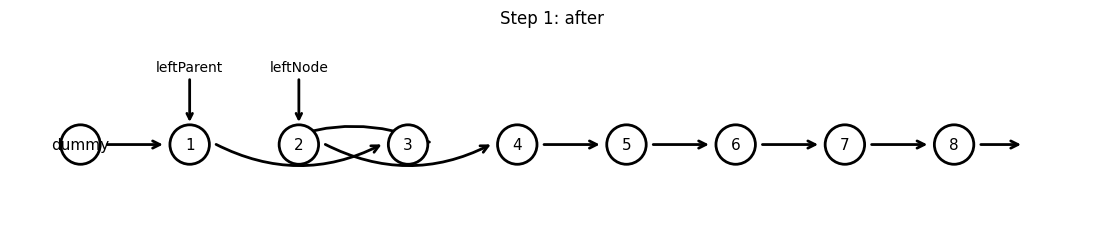

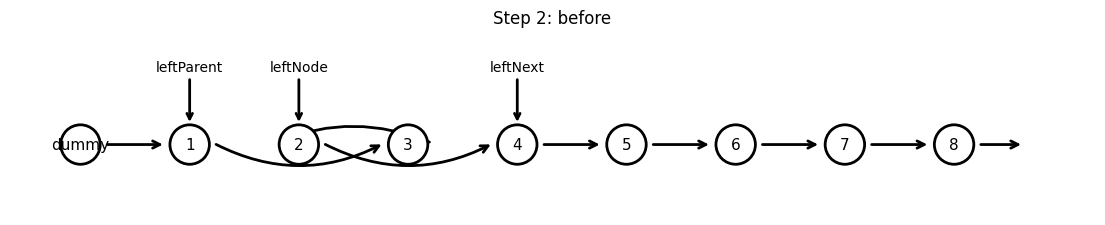

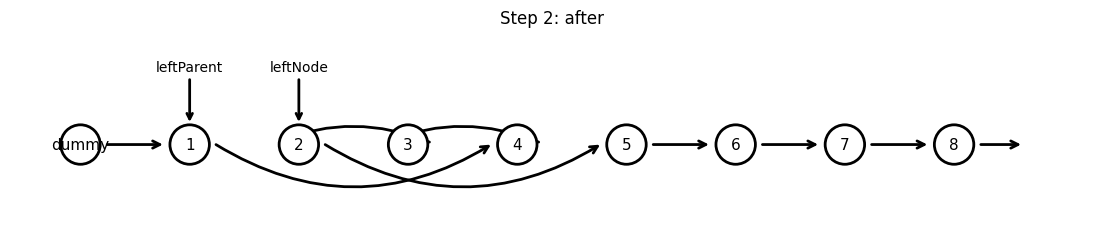

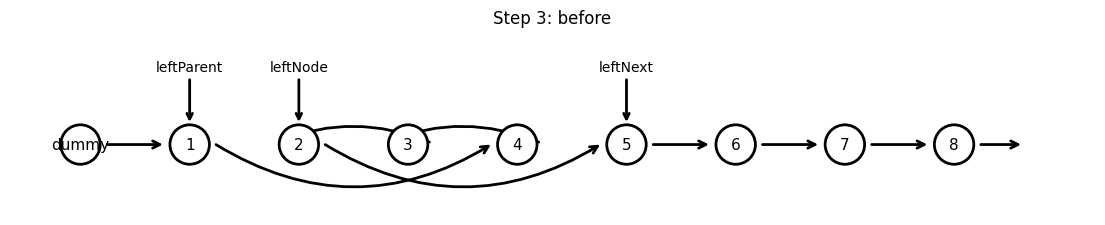

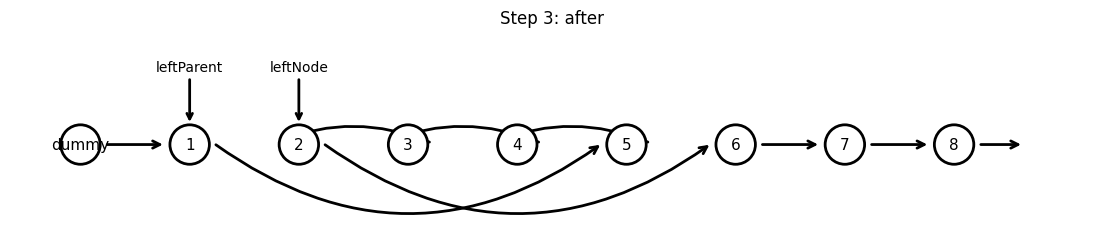

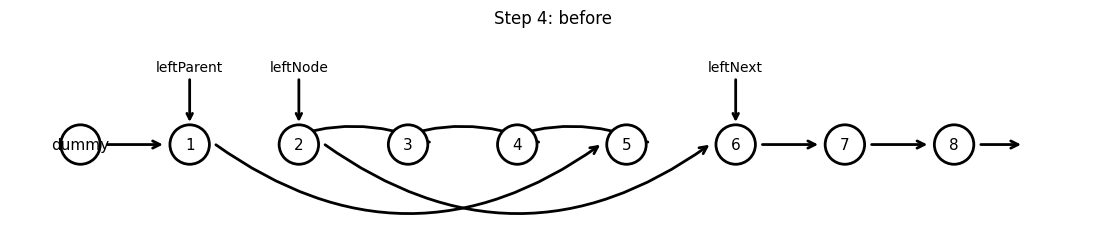

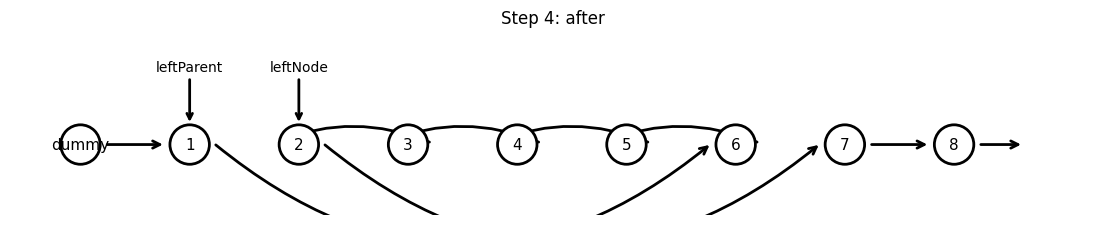

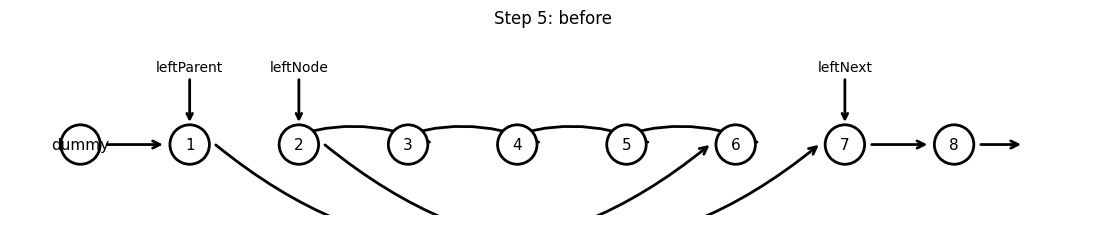

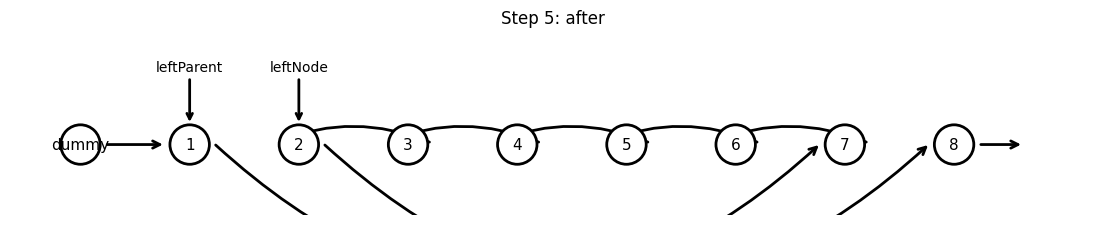

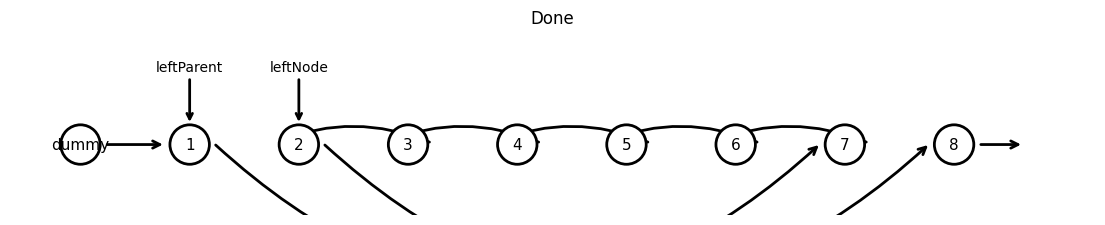

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

# ----------------------------
# simulate exact pointer rewiring (your triple assignment)
# ----------------------------
def simulate_frames(values, left, right):
    n = len(values)
    # nodes: 0=dummy, 1..n
    nxt = {i: i+1 for i in range(0, n)}
    nxt[n] = None

    # find leftParent and leftNode
    leftParent = 0
    for _ in range(left - 1):
        leftParent = nxt[leftParent]
    leftNode = nxt[leftParent]

    frames = []

    def snap(title, pointers):
        frames.append({
            "title": title,
            "nxt": nxt.copy(),
            "pointers": pointers.copy()
        })

    snap("Start", {"leftParent": leftParent, "leftNode": leftNode})

    for step in range(1, (right - left) + 1):
        leftNext = nxt[leftNode]
        snap(f"Step {step}: before", {"leftParent": leftParent, "leftNode": leftNode, "leftNext": leftNext})

        # exact parallel assignment
        a, b, c = leftParent, leftNode, leftNext
        old_a_next = nxt[a]
        old_b_next = nxt[b]   # == c
        old_c_next = nxt[c]

        nxt[a] = old_b_next
        nxt[c] = old_a_next
        nxt[b] = old_c_next

        snap(f"Step {step}: after", {"leftParent": leftParent, "leftNode": leftNode})

    snap("Done", {"leftParent": leftParent, "leftNode": leftNode})
    return frames

# ----------------------------
# drawing (nodes fixed, only existing edges per frame)
# ----------------------------
def draw_frame(ax, values, frame):
    n = len(values)

    # fixed positions
    x = {0: 0.0}
    for i in range(1, n+1):
        x[i] = i * 1.55  # tighter for 8 nodes
    y0 = 0.0

    def label(i):
        return "dummy" if i == 0 else str(values[i-1])

    ax.clear()
    ax.set_aspect("equal")
    ax.axis("off")

    # nodes
    for i in range(0, n+1):
        ax.add_patch(Circle((x[i], y0), 0.28, ec="black", lw=2, fc="white", zorder=3))
        ax.text(x[i], y0, label(i), ha="center", va="center", fontsize=11, zorder=4)

    nxt = frame["nxt"]

    def draw_edge(u, v):
        x1, y1 = x[u] + 0.34, y0
        if v is None:
            x2, y2 = x1 + 0.65, y1
            rad = 0.0
        else:
            x2, y2 = x[v] - 0.34, y0

            if v == u + 1:
                rad = 0.0
            else:
                dist = abs(v - u)
                rad = 0.16 + 0.05 * dist  # higher arc for longer jump
                y1 = y2 = y0 + 0.02

        ax.add_patch(FancyArrowPatch(
            (x1, y1), (x2, y2),
            arrowstyle="->",
            mutation_scale=13,
            linewidth=2,
            color="black",
            connectionstyle=f"arc3,rad={rad}",
            zorder=2
        ))

    # draw ONLY existing edges
    for u in range(0, n+1):
        draw_edge(u, nxt.get(u, None))

    # pointer labels
    for name, node_id in frame["pointers"].items():
        ax.annotate(
            name,
            xy=(x[node_id], y0 + 0.28),
            xytext=(x[node_id], y0 + 1.0),
            ha="center", va="bottom",
            arrowprops=dict(arrowstyle="->", lw=2),
            fontsize=10
        )

    ax.set_title(frame["title"], fontsize=12)
    ax.set_xlim(-1.0, x[n] + 2.0)
    ax.set_ylim(-1.0, 1.6)

# ----------------------------
# public: show several pictures (no animation)
# ----------------------------
def show_pictures(values, left, right, save_dir=None):
    frames = simulate_frames(values, left, right)
    for k, fr in enumerate(frames, start=1):
        fig, ax = plt.subplots(figsize=(14, 2.9))
        draw_frame(ax, values, fr)
        if save_dir is not None:
            fig.savefig(f"{save_dir}/frame_{k:02d}.png", dpi=200, bbox_inches="tight")
        plt.show()

# ----------------------------
# RUN (example)
# ----------------------------
values = [1,2,3,4,5,6,7,8]
left, right = 2, 7   # change these if you want
show_pictures(values, left, right, save_dir=None)